In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

seed=3
np.random.seed(seed)
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [2]:
labels_df = pd.read_csv('product_attributes_updated.csv', encoding='utf-8', 
                    dialect='excel', lineterminator='\n')

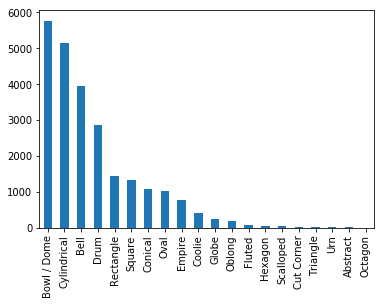

In [3]:
for ColumnName in ['Shade Shape']:
    labels_df[ColumnName].value_counts().plot(kind="bar")
    plt.show()

In [4]:
 def image2np_array( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

x_train_list=[]
y_train_list=[]

one_hot=pd.get_dummies(labels_df['Shade Shape'])

for row in labels_df.itertuples():
    if pd.notnull(row[13]):
        try:
            img = image2np_array('..\\ml_150x150_m\\'+row[1]+'.jpg').reshape(150,150,1)
        except IOError:
            continue
        x_train_list.append(img)
        y_train_list.append(one_hot.loc[row[0],:].values)

In [5]:
x_train=np.array(x_train_list)
y_train=np.array(y_train_list)
len(y_train)==len(x_train)
n_of_training_samples=int(len(x_train)*0.8)
x_validation=x_train[n_of_training_samples:]
y_validation=y_train[n_of_training_samples:]
x_train=x_train[:n_of_training_samples]
y_train=y_train[:n_of_training_samples]

In [6]:
epochs = 10
batch_size = 32

input_shape = (150, 150, 1)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5,seed=seed))
model.add(Dense(20))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    horizontal_flip=True)

model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_validation,y_validation),
                    steps_per_epoch=len(x_train) / batch_size, epochs=epochs)

Epoch 1/10
612/611 [==============================] - 36s - loss: 2.2357 - acc: 0.2352 - val_loss: 10.9194 - val_acc: 0.2707
Epoch 2/10
612/611 [==============================] - 33s - loss: 2.0904 - acc: 0.2914 - val_loss: 10.5749 - val_acc: 0.3199
Epoch 3/10
612/611 [==============================] - 33s - loss: 1.9641 - acc: 0.3465 - val_loss: 10.2606 - val_acc: 0.3487
Epoch 4/10
612/611 [==============================] - 33s - loss: 1.8469 - acc: 0.3968 - val_loss: 9.5061 - val_acc: 0.3924
Epoch 5/10
612/611 [==============================] - 33s - loss: 1.7595 - acc: 0.4303 - val_loss: 9.0736 - val_acc: 0.4268
Epoch 6/10
612/611 [==============================] - 33s - loss: 1.6812 - acc: 0.4530 - val_loss: 8.7575 - val_acc: 0.4496
Epoch 7/10
612/611 [==============================] - 33s - loss: 1.6162 - acc: 0.4755 - val_loss: 9.5056 - val_acc: 0.4043
Epoch 8/10
612/611 [==============================] - 33s - loss: 1.5537 - acc: 0.4924 - val_loss: 9.8073 - val_acc: 0.3867
Epoch

In [8]:
model.save('Shade_Shape_classifier.h5')